In [18]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd



In [2]:
dist_df = pd.read_csv("bulk/prepat_deseq2_limma_corr_pca_distances.tsv",sep="\t",index_col=0)

In [3]:
all_samples = dist_df.index
import re
all_samples = [re.sub(".*_","",x) for x in all_samples]

In [4]:
from collections import Counter
tmp = Counter(all_samples)
matching_samples = []
for x in tmp:
    if tmp[x]>1:
        matching_samples.append(x)

In [5]:
dist_matching = []
for sample1 in matching_samples:
    for sample2 in matching_samples:
        dm = dist_df.loc['iGlut_pre_'+sample1,'iGABA_pre_'+sample2]
        dist_matching.append(dict(sample1=sample1,sample2=sample2,d=dm))

dist_matching = pd.DataFrame(dist_matching)

In [6]:
dms = list(dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'d'])
dds = list(dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'d'])

In [7]:
dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'matching'] = 1
dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'matching'] = 0

In [8]:
import seaborn as sns

<Axes: xlabel='matching', ylabel='d'>

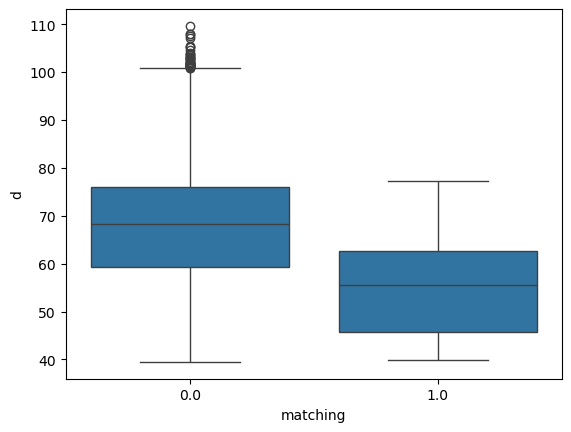

In [9]:
sns.boxplot(x='matching',y='d',data=dist_matching)

In [10]:
import scipy
scipy.stats.mannwhitneyu(x=dms,y=dds)

MannwhitneyuResult(statistic=158353.0, pvalue=2.2861713714249086e-22)

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
mpl.rcParams['pdf.fonttype'] = 42

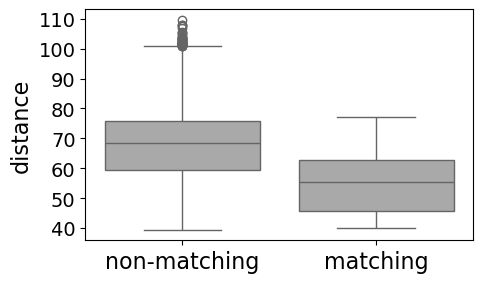

In [30]:
plt.figure(figsize=(5,3))
sns.boxplot(x='matching',y='d',data=dist_matching,color='darkgrey')
plt.xticks(ticks=[0,1],labels=['non-matching','matching'],fontsize=16)
plt.xlabel('')
plt.yticks(fontsize=14)
plt.ylabel('distance',fontsize=16)
plt.savefig("prepat_plots/distance_vsd_corr.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("prepat_plots/distance_vsd_corr.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [11]:
iglut_matching = ['iGlut_pre_'+x for x in matching_samples]
igabba_matching = ['iGABA_pre_'+x for x in matching_samples]


In [12]:
dist_df_matching = dist_df.loc[iglut_matching,igabba_matching].copy()

In [13]:
dist_df_matching.min().min()

39.4906543665693

In [14]:
dist_df_matching.max().max()

109.628383351266

In [15]:
dist_df_matching_norm = (dist_df_matching-dist_df_matching.min().min())/(dist_df_matching.max().max()-dist_df_matching.min().min())

<Axes: >

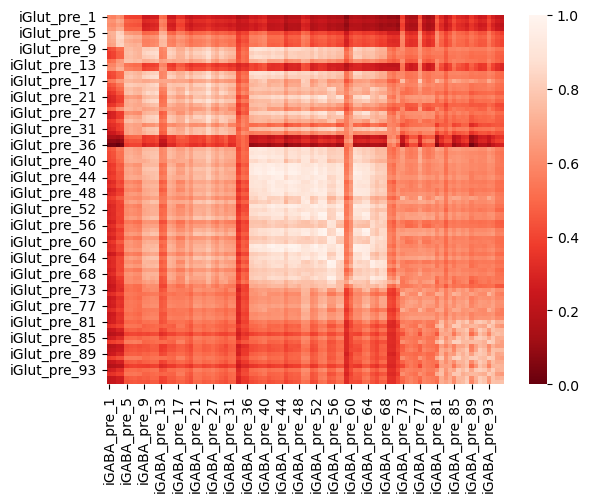

In [17]:
sns.heatmap(1-dist_df_matching_norm,cmap='Reds_r')

<Axes: >

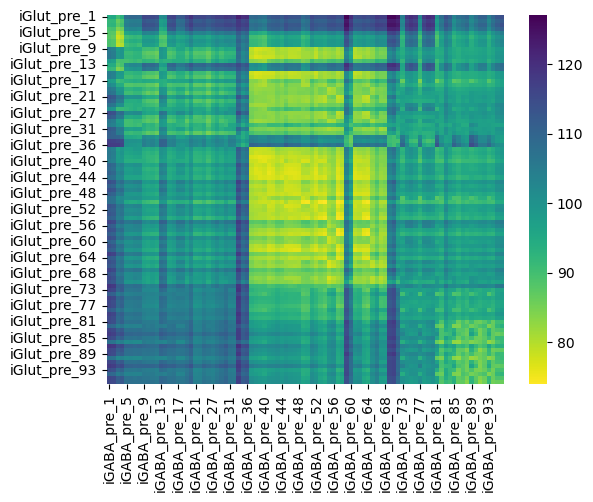

In [94]:
sns.heatmap(dist_df.loc[iglut_matching,igabba_matching],cmap='viridis_r')

<Axes: >

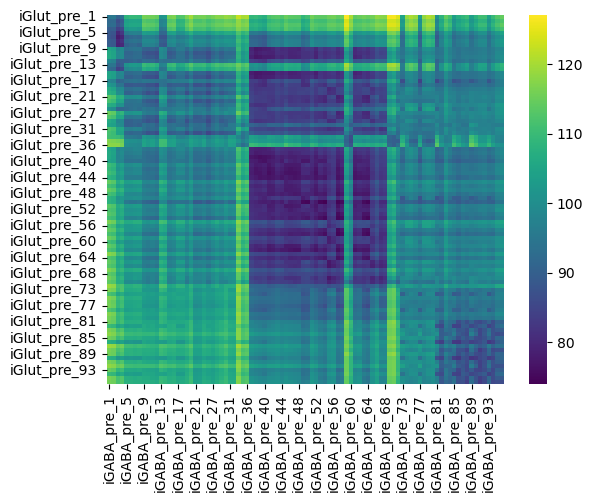

In [95]:
sns.heatmap(dist_df.loc[iglut_matching,igabba_matching],cmap='viridis')

In [78]:
dist_df.max().sort_values(ascending=False)

iGlut_pre_1     112.993158
iGlut_pre_36    112.993158
iGlut_pre_35    110.151862
iGlut_pre_3     109.832967
iGABA_pre_3     109.628383
                   ...    
iGABA_pre_17     85.564507
iGABA_pre_8      84.885811
iGABA_pre_5      84.387602
iGABA_pre_7      84.180693
iGABA_pre_6      82.886584
Length: 188, dtype: float64